In [52]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Spotify/Resources/Spotify_data.csv")
df


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [2]:
columns = [
    'Age', 'Gender', 'premium_sub_willingness',
    'spotify_listening_device',
    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
    'music_recc_rating', 'spotify_usage_period', 'spotify_subscription_plan',
    'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre',
    'music_time_slot', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
    'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction'
]

df_cluster = df[columns].copy().fillna("None")


In [3]:
multi_label_cols = ['spotify_listening_device','music_Influencial_mood', 'music_lis_frequency', 'music_expl_method']
mlb = MultiLabelBinarizer()

for col in multi_label_cols:
    df_cluster[col] = df_cluster[col].str.split(", ")
    encoded = pd.DataFrame(mlb.fit_transform(df_cluster[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    df_cluster = pd.concat([df_cluster.drop(columns=[col]), encoded], axis=1)


In [4]:
df_cluster.head()


,Age,Gender,premium_sub_willingness,music_recc_rating,spotify_usage_period,spotify_subscription_plan,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,...,music_lis_frequency_leisure time,music_lis_frequency_when cooking,music_expl_method_Friends,music_expl_method_Others,music_expl_method_Playlists,music_expl_method_Radio,music_expl_method_Search,music_expl_method_Social media,music_expl_method_recommendations,"music_expl_method_recommendations,Others"
0,20-35,Female,Yes,3,More than 2 years,Free (ad-supported),Family Plan-Rs 179/month,Podcast,Melody,Night,...,1,0,0,0,1,0,0,0,0,0
1,12-20,Male,Yes,2,More than 2 years,Free (ad-supported),Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,...,0,0,0,0,1,0,0,0,0,0
2,35-60,Others,Yes,4,6 months to 1 year,Free (ad-supported),Student Plan-Rs 59/month,Podcast,Pop,Night,...,0,0,0,0,1,0,0,0,0,0
3,20-35,Female,No,4,1 year to 2 years,Free (ad-supported),None,Music,Melody,Night,...,1,0,0,0,1,0,0,0,1,0
4,20-35,Female,No,4,1 year to 2 years,Free (ad-supported),None,Music,Melody,Night,...,1,0,0,0,1,0,0,0,1,0


In [5]:
df_cluster.filter(like="music_Influencial_mood").head()


,music_Influencial_mood_Relaxation and stress relief,music_Influencial_mood_Sadness or melancholy,music_Influencial_mood_Social gatherings or parties,music_Influencial_mood_Uplifting and motivational
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,1,0
4,1,0,0,0


In [6]:
# Keep music_recc_rating as numeric — we won't encode it
# Get all remaining columns that are still categorical
categorical_cols = list(set(df_cluster.columns) - {'music_recc_rating'})

# One-hot encode those remaining columns
df_cluster = pd.get_dummies(df_cluster, columns=categorical_cols, drop_first=True)

# Optional: check final shape
print("Final shape after encoding:", df_cluster.shape)


Final shape after encoding: (520, 94)


In [7]:
df_cluster.head()


,music_recc_rating,spotify_listening_device_Smart speakers or voice assistants_1,music_Influencial_mood_Relaxation and stress relief_1,music_expl_method_Radio_1,music_expl_method_Friends_1,spotify_listening_device_Wearable devices_1,music_expl_method_Playlists_1,music_Influencial_mood_Social gatherings or parties_1,music_lis_frequency_Night time_1,Gender_Male,...,pod_lis_frequency_Rarely,pod_lis_frequency_Several times a week,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter,music_lis_frequency__1,music_lis_frequency_Office hours_1,pod_host_preference_None,pod_host_preference_Well known individuals,pod_host_preference_unknown Podcasters
0,3,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,True,True,False,True,...,False,True,False,True,False,False,False,False,False,False
2,4,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,True,True,False,False,False,True,True,False,False,...,False,False,False,True,False,False,True,True,False,False
4,4,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale all features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)


In [9]:
from sklearn.cluster import KMeans

# Run K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the original dataframe
df['cluster'] = cluster_labels

# Optional: check how many users are in each cluster
print(df['cluster'].value_counts())


cluster
2    252
0    135
3     71
1     62
Name: count, dtype: int64


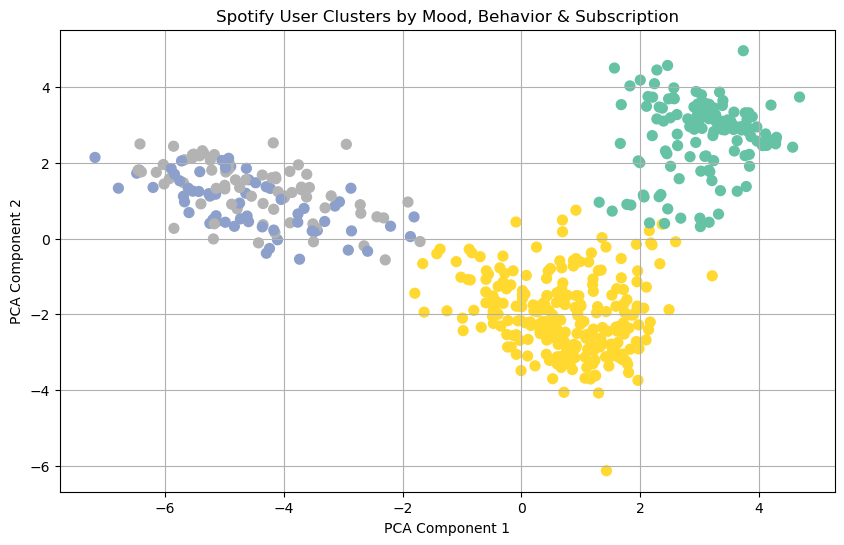

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df['cluster'], cmap='Set2', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Spotify User Clusters by Mood, Behavior & Subscription")
plt.grid(True)
plt.show()


In [11]:
# Create a copy of just the two multi-select columns
df_mood_freq = df[['music_Influencial_mood', 'music_lis_frequency']].copy().fillna("None")


In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_label_cols = ['music_Influencial_mood', 'music_lis_frequency']
mlb = MultiLabelBinarizer()

# Loop through and transform each multi-select column
for col in multi_label_cols:
    df_mood_freq[col] = df_mood_freq[col].str.split(", ")
    encoded = pd.DataFrame(mlb.fit_transform(df_mood_freq[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    df_mood_freq = pd.concat([df_mood_freq.drop(columns=[col]), encoded], axis=1)

# Optional: preview the one-hot encoded features
df_mood_freq.head()


,music_Influencial_mood_Relaxation and stress relief,music_Influencial_mood_Sadness or melancholy,music_Influencial_mood_Social gatherings or parties,music_Influencial_mood_Uplifting and motivational,music_lis_frequency_,music_lis_frequency_Before bed,music_lis_frequency_Night time,music_lis_frequency_Office hours,"music_lis_frequency_Office hours,Study Hours",music_lis_frequency_Random,music_lis_frequency_Social gatherings,music_lis_frequency_Study Hours,music_lis_frequency_While Traveling,music_lis_frequency_Workout session,music_lis_frequency_leisure time,music_lis_frequency_when cooking
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_mood_freq = scaler.fit_transform(df_mood_freq)


In [14]:
from sklearn.cluster import KMeans

# Use 3 clusters for a simple emotional segmentation
kmeans_mood = KMeans(n_clusters=3, random_state=42)
df['mood_cluster'] = kmeans_mood.fit_predict(scaled_mood_freq)

# See how many users fall into each cluster
df['mood_cluster'].value_counts()


mood_cluster
0    349
1    170
2      1
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


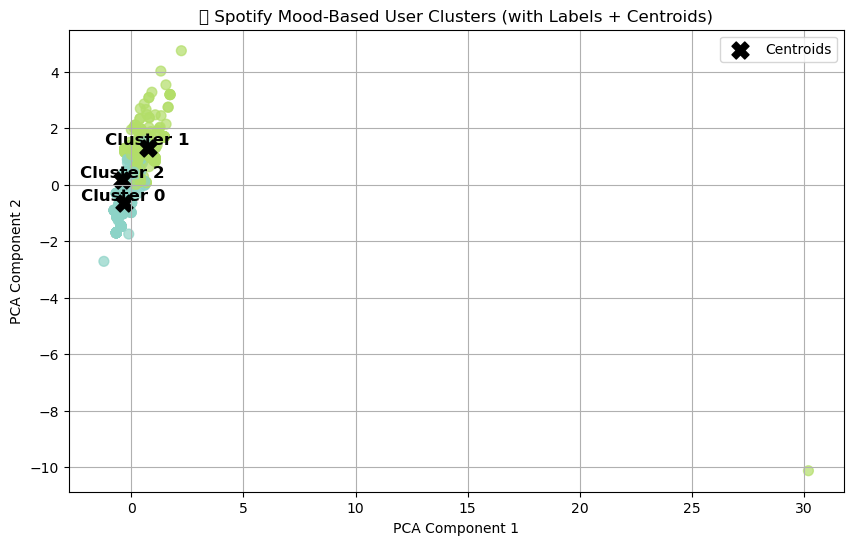

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D with PCA
pca_mood = PCA(n_components=2)
components_mood = pca_mood.fit_transform(scaled_mood_freq)

# Project the centroids into PCA space
centroids_2d = pca_mood.transform(kmeans_mood.cluster_centers_)

# Plot with labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components_mood[:, 0], components_mood[:, 1], c=df['mood_cluster'], cmap='Set3', s=50, alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', s=150, marker='X', label='Centroids')

# Annotate centroids with cluster labels
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y + 0.1, f"Cluster {i}", fontsize=12, ha='center', fontweight='bold')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("🎧 Spotify Mood-Based User Clusters (with Labels + Centroids)")
plt.grid(True)
plt.legend()
plt.show()


In [16]:
# Extract relevant columns
df_age_mood_freq = df[['Age', 'music_Influencial_mood', 'music_lis_frequency']].copy().fillna("None")


In [17]:
# Turn age ranges into binary columns
df_age_mood_freq = pd.get_dummies(df_age_mood_freq, columns=['Age'], drop_first=True)


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_label_cols = ['music_Influencial_mood', 'music_lis_frequency']
mlb = MultiLabelBinarizer()

for col in multi_label_cols:
    df_age_mood_freq[col] = df_age_mood_freq[col].str.split(", ")
    encoded = pd.DataFrame(mlb.fit_transform(df_age_mood_freq[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    df_age_mood_freq = pd.concat([df_age_mood_freq.drop(columns=[col]), encoded], axis=1)

# Optional: preview the result
df_age_mood_freq.head()


,Age_20-35,Age_35-60,Age_6-12,Age_60+,music_Influencial_mood_Relaxation and stress relief,music_Influencial_mood_Sadness or melancholy,music_Influencial_mood_Social gatherings or parties,music_Influencial_mood_Uplifting and motivational,music_lis_frequency_,music_lis_frequency_Before bed,music_lis_frequency_Night time,music_lis_frequency_Office hours,"music_lis_frequency_Office hours,Study Hours",music_lis_frequency_Random,music_lis_frequency_Social gatherings,music_lis_frequency_Study Hours,music_lis_frequency_While Traveling,music_lis_frequency_Workout session,music_lis_frequency_leisure time,music_lis_frequency_when cooking
0,True,False,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,False,True,False,False,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,True,False,False,False,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
4,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_age_mood_freq = scaler.fit_transform(df_age_mood_freq)


In [20]:
from sklearn.cluster import KMeans

kmeans_age_mood = KMeans(n_clusters=3, random_state=42)
df['age_mood_cluster'] = kmeans_age_mood.fit_predict(scaled_age_mood_freq)

# Optional: check cluster counts
df['age_mood_cluster'].value_counts()


age_mood_cluster
0    322
2    111
1     87
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


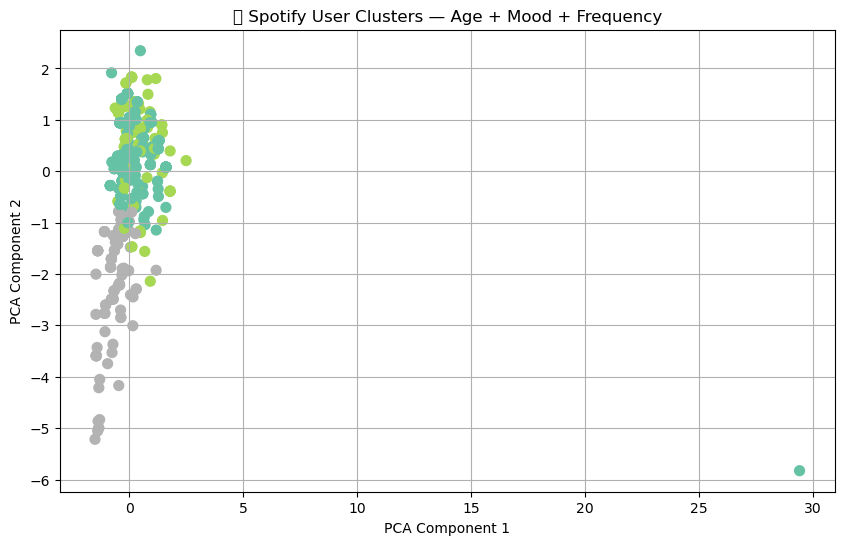

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components_age_mood = pca.fit_transform(scaled_age_mood_freq)

plt.figure(figsize=(10, 6))
plt.scatter(components_age_mood[:, 0], components_age_mood[:, 1], c=df['age_mood_cluster'], cmap='Set2', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("🎯 Spotify User Clusters — Age + Mood + Frequency")
plt.grid(True)
plt.show()


In [22]:
# Add labels back to the processed DataFrame
df_age_mood_freq['age_mood_cluster'] = df['age_mood_cluster']

# Group and summarize
age_mood_summary = df_age_mood_freq.groupby('age_mood_cluster').mean()

# Extract top 5 traits per cluster
top_age_mood_features = {}
for cluster in age_mood_summary.index:
    top_traits = age_mood_summary.loc[cluster].sort_values(ascending=False).head(5)
    top_age_mood_features[f"Cluster {cluster}"] = top_traits

# Convert to DataFrame for display
top_age_mood_df = pd.DataFrame(top_age_mood_features)
top_age_mood_df


,Cluster 0,Cluster 1,Cluster 2
Age_20-35,0.950311,0.954023,NaN
music_Influencial_mood_Relaxation and stress relief,0.832298,0.862069,NaN
music_Influencial_mood_Sadness or melancholy,NaN,NaN,0.387387
music_Influencial_mood_Uplifting and motivational,0.319876,0.436782,0.522523
music_lis_frequency_Office hours,NaN,0.977011,NaN
music_lis_frequency_Study Hours,NaN,NaN,0.378378
music_lis_frequency_While Traveling,0.701863,0.666667,0.423423
music_lis_frequency_Workout session,NaN,NaN,0.486486
music_lis_frequency_leisure time,0.645963,NaN,NaN


In [23]:
df_device_behavior = df[['spotify_listening_device', 'spotify_usage_period', 'music_lis_frequency', 'music_expl_method']].copy().fillna("None")


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_label_cols = ['spotify_listening_device', 'music_lis_frequency', 'music_expl_method']
mlb = MultiLabelBinarizer()

for col in multi_label_cols:
    df_device_behavior[col] = df_device_behavior[col].str.split(", ")
    encoded = pd.DataFrame(mlb.fit_transform(df_device_behavior[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    df_device_behavior = pd.concat([df_device_behavior.drop(columns=[col]), encoded], axis=1)


In [25]:
df_device_behavior = pd.get_dummies(df_device_behavior, columns=['spotify_usage_period'], drop_first=True)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaled_device = StandardScaler().fit_transform(df_device_behavior)

kmeans_device = KMeans(n_clusters=3, random_state=42)
df['device_cluster'] = kmeans_device.fit_predict(scaled_device)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


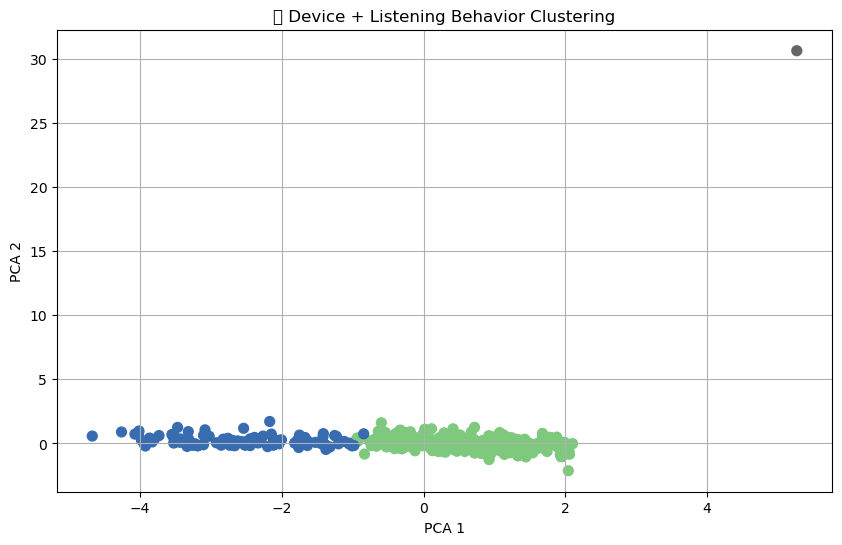

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components_device = pca.fit_transform(scaled_device)

plt.figure(figsize=(10, 6))
plt.scatter(components_device[:, 0], components_device[:, 1], c=df['device_cluster'], cmap='Accent', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("🔌 Device + Listening Behavior Clustering")
plt.grid(True)
plt.show()


In [28]:
df_subscription = df[['spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'music_recc_rating']].copy().fillna("None")


In [29]:
df_subscription = pd.get_dummies(df_subscription, columns=['spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan'], drop_first=True)


In [30]:
scaled_sub = StandardScaler().fit_transform(df_subscription)

kmeans_sub = KMeans(n_clusters=3, random_state=42)
df['sub_cluster'] = kmeans_sub.fit_predict(scaled_sub)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


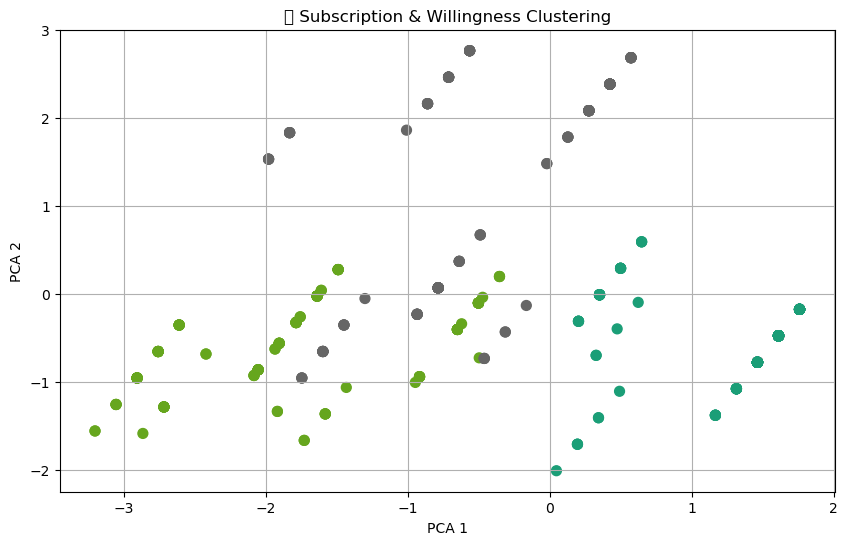

In [31]:
components_sub = PCA(n_components=2).fit_transform(scaled_sub)

plt.figure(figsize=(10, 6))
plt.scatter(components_sub[:, 0], components_sub[:, 1], c=df['sub_cluster'], cmap='Dark2', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("💳 Subscription & Willingness Clustering")
plt.grid(True)
plt.show()


In [32]:
df_sub_simple = df[['premium_sub_willingness', 'spotify_subscription_plan']].copy().fillna("None")


In [33]:
df_sub_simple = pd.get_dummies(df_sub_simple, columns=['premium_sub_willingness', 'spotify_subscription_plan'], drop_first=True)

# Optional: preview the result
df_sub_simple.head()


,premium_sub_willingness_Yes,spotify_subscription_plan_Premium (paid subscription)
0,True,False
1,True,False
2,True,False
3,False,False
4,False,False


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_sub_simple = scaler.fit_transform(df_sub_simple)


In [35]:
from sklearn.cluster import KMeans

kmeans_simple = KMeans(n_clusters=2, random_state=42)
df['sub_intent_cluster'] = kmeans_simple.fit_predict(scaled_sub_simple)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


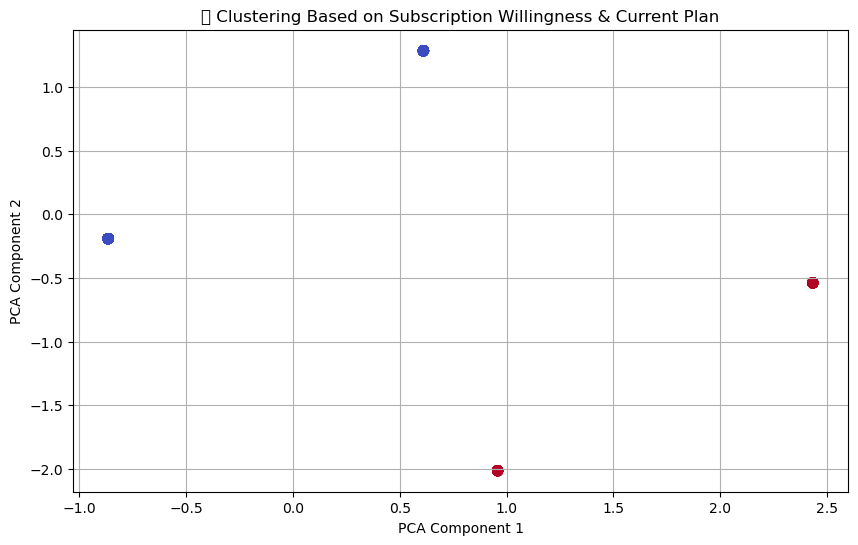

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components_sub_simple = pca.fit_transform(scaled_sub_simple)

plt.figure(figsize=(10, 6))
plt.scatter(components_sub_simple[:, 0], components_sub_simple[:, 1], c=df['sub_intent_cluster'], cmap='coolwarm', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("💳 Clustering Based on Subscription Willingness & Current Plan")
plt.grid(True)
plt.show()


In [37]:
# Final persona labels for sub_intent_cluster
sub_intent_labels = {
    0: "Free & Casual Listeners",
    1: "Engaged Premium Subscribers"
}

# Map to a new persona column
df['persona'] = df['sub_intent_cluster'].map(sub_intent_labels)


In [38]:
# Check how many users in each persona group
df['persona'].value_counts()


persona
Free & Casual Listeners        424
Engaged Premium Subscribers     96
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128265 (\N{SPEAKER WITH ONE SOUND WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


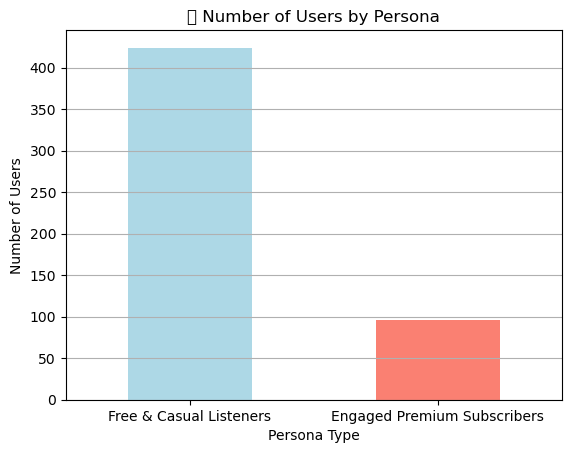

In [39]:
import matplotlib.pyplot as plt

# Bar chart of persona counts
df['persona'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("🔉 Number of Users by Persona")
plt.xlabel("Persona Type")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


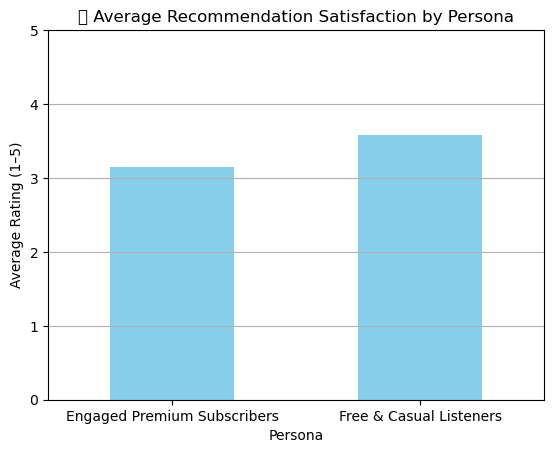

In [40]:
# Bar plot of average satisfaction
df.groupby('persona')['music_recc_rating'].mean().plot(kind='bar', color='skyblue')
plt.title("⭐ Average Recommendation Satisfaction by Persona")
plt.xlabel("Persona")
plt.ylabel("Average Rating (1–5)")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_19284/3321979527.py:12: UserWarning: Glyph 128246 (\N{ANTENNA WITH BARS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128246 (\N{ANTENNA WITH BARS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


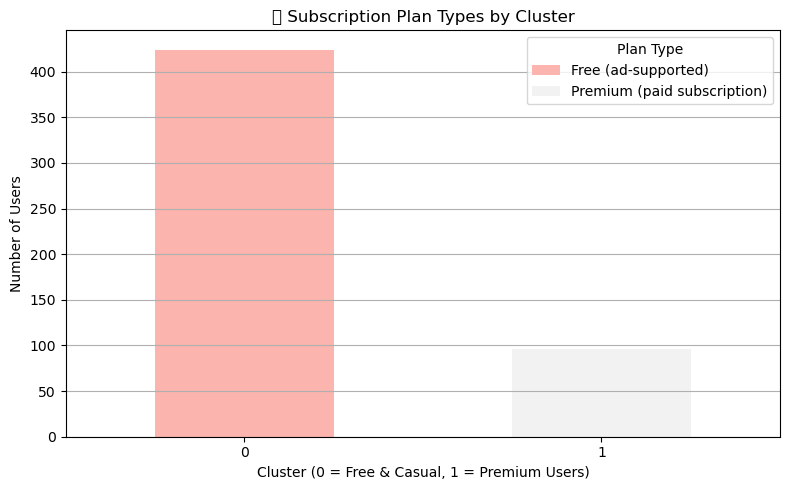

In [41]:
# Cross-tab to compare plan types across clusters
plan_counts = pd.crosstab(df['sub_intent_cluster'], df['spotify_subscription_plan'])

# Plot as stacked bar
plan_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')
plt.title("📶 Subscription Plan Types by Cluster")
plt.xlabel("Cluster (0 = Free & Casual, 1 = Premium Users)")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title="Plan Type")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

df_mood_freq = df[['music_Influencial_mood']].copy().fillna("None")
df_mood_freq['music_Influencial_mood'] = df_mood_freq['music_Influencial_mood'].str.split(", ")

mlb = MultiLabelBinarizer()
mood_encoded = pd.DataFrame(mlb.fit_transform(df_mood_freq['music_Influencial_mood']), 
                            columns=[f"music_Influencial_mood_{m}" for m in mlb.classes_])

# Merge with main df
df = pd.concat([df, mood_encoded], axis=1)


In [43]:
mood_cols = [col for col in df.columns if col.startswith('music_Influencial_mood_')]
print("Mood columns found:", mood_cols)


Mood columns found: ['music_Influencial_mood_Relaxation and stress relief', 'music_Influencial_mood_Sadness or melancholy', 'music_Influencial_mood_Social gatherings or parties', 'music_Influencial_mood_Uplifting and motivational']


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_19284/1660990601.py:15: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


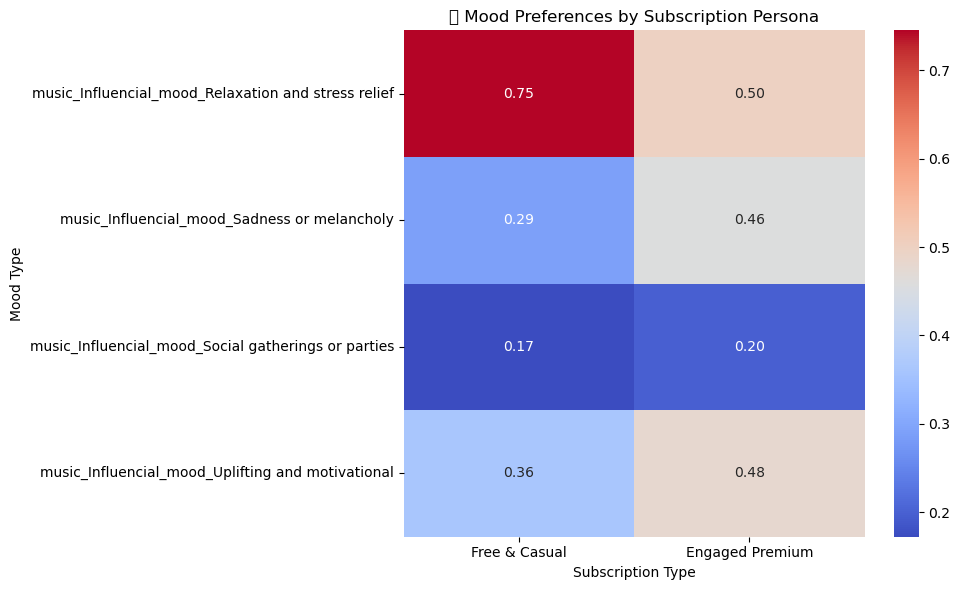

In [44]:
# Combine mood columns with subscription cluster
df_moods = df[['sub_intent_cluster'] + mood_cols].copy()
mood_summary_by_sub = df_moods.groupby('sub_intent_cluster').mean().T
mood_summary_by_sub.columns = ['Free & Casual', 'Engaged Premium']

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(mood_summary_by_sub, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🎧 Mood Preferences by Subscription Persona")
plt.xlabel("Subscription Type")
plt.ylabel("Mood Type")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the multi-select frequency column
df_freq = df[['music_lis_frequency']].copy().fillna("None")
df_freq['music_lis_frequency'] = df_freq['music_lis_frequency'].str.split(", ")

# One-hot encode using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
freq_encoded = pd.DataFrame(mlb.fit_transform(df_freq['music_lis_frequency']), 
                            columns=[f"music_lis_frequency_{f}" for f in mlb.classes_])

# Merge back into the main DataFrame
df = pd.concat([df, freq_encoded], axis=1)


In [46]:
# Get only the encoded frequency columns
freq_cols = [col for col in df.columns if col.startswith('music_lis_frequency_')]

# Combine with subscription cluster
df_freq_sub = df[['sub_intent_cluster'] + freq_cols].copy()


In [47]:
# Calculate average frequency response per cluster
freq_summary_by_sub = df_freq_sub.groupby('sub_intent_cluster').mean().T

# Rename columns for readability
freq_summary_by_sub.columns = ['Free & Casual', 'Engaged Premium']


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_19284/71694216.py:9: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


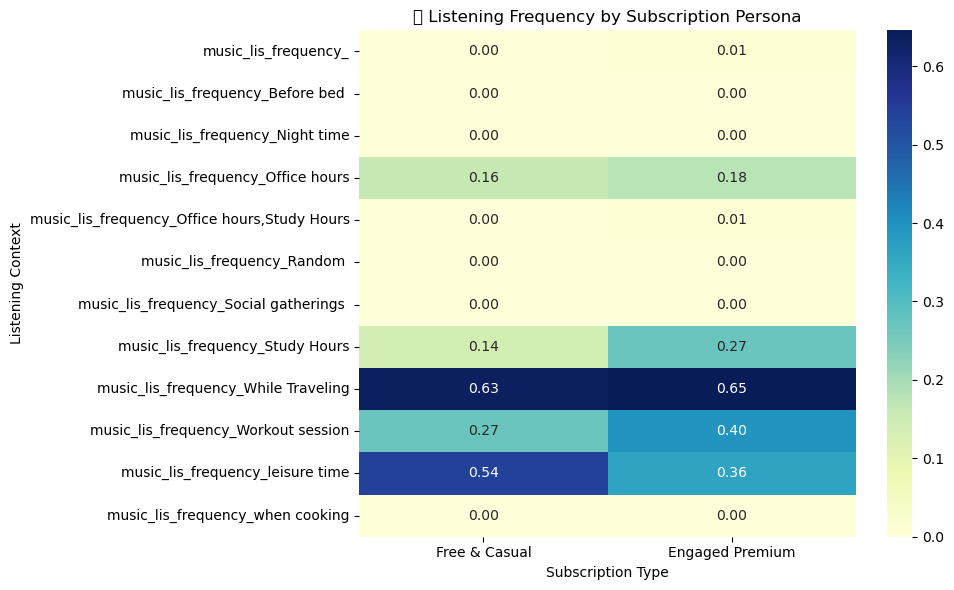

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(freq_summary_by_sub, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🎧 Listening Frequency by Subscription Persona")
plt.xlabel("Subscription Type")
plt.ylabel("Listening Context")
plt.tight_layout()
plt.show()


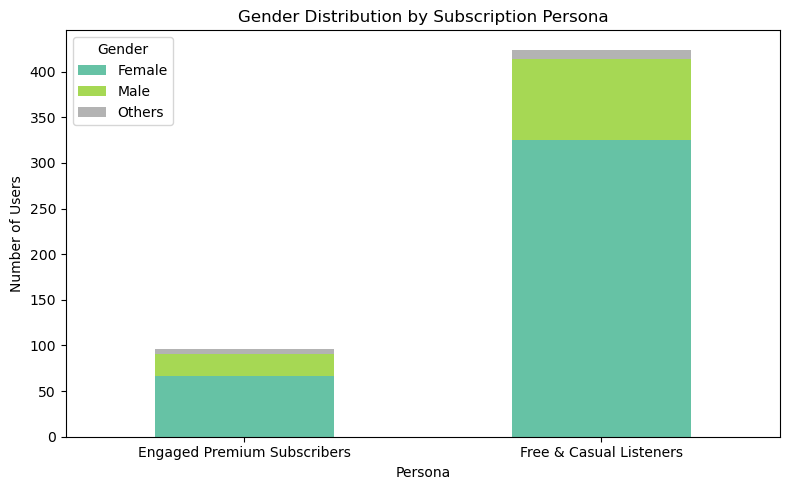

In [49]:
# Gender distribution by persona (stacked bar chart)
import matplotlib.pyplot as plt
import pandas as pd

pd.crosstab(df['persona'], df['Gender']).plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='Set2'
)
plt.title("Gender Distribution by Subscription Persona")
plt.xlabel("Persona")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


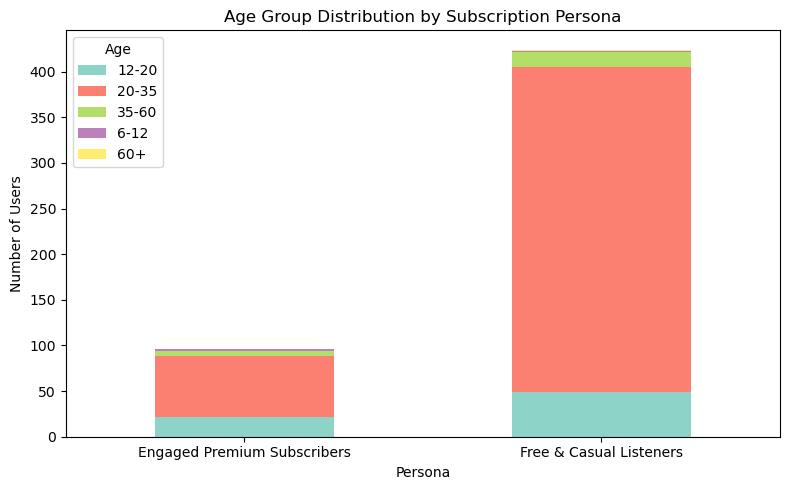

In [50]:
# Age group distribution by persona (stacked bar chart)
pd.crosstab(df['persona'], df['Age']).plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='Set3'
)
plt.title("Age Group Distribution by Subscription Persona")
plt.xlabel("Persona")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [51]:
import streamlit as st
import pandas as pd

# Define persona descriptions, recommendations, and traits
personas = {
    "Free & Casual Listeners": {
        "description": "On free plans, low engagement, not likely to subscribe. Often listen while multitasking.",
        "recommendation": [
            "🎧 Try the Viral Hits playlist",
            "🕑 Background Beats for Cleaning or Sleep",
            "🎁 Get 1-Month Premium Trial — No Strings Attached!"
        ],
        "traits": {
            "premium_sub_willingness_No": 0.90,
            "spotify_subscription_plan_Free (ad-supported)": 0.92,
            "music_Influencial_mood_Sadness": 0.42,
            "music_lis_frequency_leisure time": 0.68,
            "Age_20-35": 0.55
        }
    },
    "Engaged Premium Users": {
        "description": "Already subscribed or willing, highly engaged. Use Spotify for workouts, focus, and mood-based listening.",
        "recommendation": [
            "💪 Power Workout Mix",
            "🧘 Chill Vibes & Deep Focus playlists",
            "🎙️ Personalized Podcasts: Try 'Daily Drive' or 'Your Top Picks'"
        ],
        "traits": {
            "premium_sub_willingness_Yes": 0.75,
            "spotify_subscription_plan_Premium": 0.85,
            "music_Influencial_mood_Motivation": 0.61,
            "music_lis_frequency_during workout": 0.53,
            "Age_20-35": 0.94
        }
    }
}

# Streamlit UI
st.title("🎧 Spotify Persona Recommender")
st.write("Select a Spotify persona to see personalized insights and content suggestions:")

# Persona selection dropdown
selected = st.selectbox("Choose a user persona", list(personas.keys()))

# Display persona summary
st.subheader(f"👤 {selected}")
st.write(personas[selected]["description"])

# Display recommendations
st.markdown("### 🔮 Recommended For You:")
for rec in personas[selected]["recommendation"]:
    st.write(f"- {rec}")

# Display traits table
st.markdown("### 🧠 Top Cluster Traits:")
traits_df = pd.DataFrame.from_dict(
    personas[selected]["traits"],
    orient='index',
    columns=["% of Users"]
)
st.dataframe(traits_df.style.format({"% of Users": "{:.0%}"}))


2025-05-19 15:20:31.283 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-19 15:20:31.285 Session state does not function when running a script without `streamlit run`


DeltaGenerator()